In [18]:
import cv2 as cv
from matplotlib import pyplot as plt
import math
import numpy as np

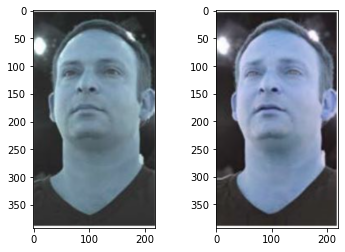

In [28]:
img1 = cv.imread("inp1.png")
img2 = cv.imread("inp2.png")
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1)
axarr[1].imshow(img2)

# Step 1: Convert into grayscale

True

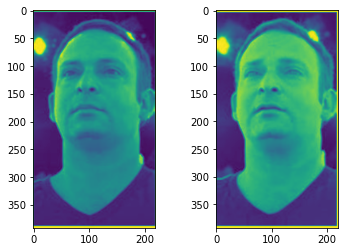

In [29]:
b, g, r = cv.split(img1)
img1 = 0.2989 * r + 0.5870 * g + 0.1140 * b

b, g, r = cv.split(img2)
img2 = 0.2989 * r + 0.5870 * g + 0.1140 * b

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1)
axarr[1].imshow(img2)

cv.imwrite("inp1_gray.png", img1)
cv.imwrite("inp2_gray.png", img2)

# Step 2: Calculate the mean and the standard deviation of both images

In [30]:
[row1, col1] = img1.shape
[row2, col2] = img2.shape
m1 = float(0)
m2 = float(0)
#Calculating mean for image1
for i in range(row1):
    for j in range(col1):
        m1 += img1[i][j]
m1 = m1 / (row1 * col1)

#Calculating mean for image2
for i in range(row2):
    for j in range(col2):
        m2 += img2[i][j]
m2 = m2 / (row2 * col2)

sd1 = float(0)
sd2 = float(0)

#Calculating standard deviation for image1
for i in range(row1):
    for j in range(col1):
        sd1 += math.pow(img1[i][j] - m1, 2)
sd1 = math.sqrt(sd1 / ((row1 * col1) - 1))

#Calculating standard deviation for image2
for i in range(row2):
    for j in range(col2):
        sd2 += math.pow(img2[i][j] - m2, 2)
sd2 = math.sqrt(sd2 / ((row2 * col2) - 1))

print("Mean of Image 1: {}".format(m1))
print("Standard Deviation of Image 1: {}".format(sd1))
print("Mean of Image 2: {}".format(m2))
print("Standard Deviation of Image 2: {}".format(sd2))

Mean of Image 1: 109.94069977735013
Standard Deviation of Image 1: 54.92259631598982
Mean of Image 2: 120.92924329400678
Standard Deviation of Image 2: 63.720853804171476


# Step 3: Calculate Normalized Cross Correlation (NCC)

In [31]:
c = 0
r = 0
for i1, i2 in zip(range(row1), range(row2)):
    for j1, j2 in zip(range(col1), range(col2)):
        c += (img1[i1][j1] - m1) * (img2[i2][j2] - m2)
c = c / ((row2 * col2) - 1)
r = c / (sd1 * sd2)
print("Normalized Cross Correlation is {}".format(r))

Normalized Cross Correlation is 0.9324742236015104
